In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.options.mode.chained_assignment = None

# Data Scraping

In [ ]:
df_list = pd.read_html('https://fbref.com/en/comps/8/2023-2024/schedule/2023-2024-Champions-League-Scores-and-Fixtures')

for idx, df in enumerate(df_list):
    file_name = f'table_{idx}.csv'
    df.to_csv(file_name, index=False)

So we scraped 4 tables from the webpage:
- table_0: all rounds (excluding qualifying rounds)
- table_1: qualifying rounds
- table_2: group stage
- table_3: knockout phase

for this analysis we will be mainly using data from table_0.

In [ ]:
df = df_list[0]
print(df.shape)
df.head(10)

(132, 15)


,Round,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,Group stage,1,Tue,2023-09-19,18:45,Milan it,1.9,0–0,0.3,eng Newcastle Utd,65695,Stadio Giuseppe Meazza,José Sánchez,Match Report,NaN
1,Group stage,1,Tue,2023-09-19,18:45,Young Boys ch,0.5,1–3,2.6,de RB Leipzig,31500,Stadion Wankdorf,Enea Jorgji,Match Report,NaN
2,Group stage,1,Tue,2023-09-19,20:00,Manchester City eng,4.1,3–1,0.8,rs Red Star,50204,Etihad Stadium,João Pinheiro,Match Report,NaN
3,Group stage,1,Tue,2023-09-19,21:00,Paris S-G fr,2.4,2–0,0.7,de Dortmund,47379,Parc des Princes,Jesús Gil,Match Report,NaN
4,Group stage,1,Tue,2023-09-19,21:00,Lazio it,1.2,1–1,0.9,es Atlético Madrid,46168,Stadio Olimpico,Slavko Vinčič,Match Report,NaN
5,Group stage,1,Tue,2023-09-19,21:00,Feyenoord nl,1.6,2–0,0.3,sct Celtic,44008,Stadion Feijenoord,Irfan Peljto,Match Report,NaN
6,Group stage,1,Tue,2023-09-19,21:00,Barcelona es,2.8,5–0,0.3,be Antwerp,40989,Estadi Olímpic Lluís Companys,Radu Petrescu,Match Report,NaN
7,Group stage,1,Tue,2023-09-19,22:00,Shakhtar ua,0.5,1–3,1.8,pt Porto,46729,Volksparkstadion,Davide Massa,Match Report,NaN
8,Group stage,1,Wed,2023-09-20,18:45,Real Madrid es,3.7,1–0,0.2,de Union Berlin,65207,Estadio Santiago Bernabéu,Espen Eskås,Match Report,NaN
9,Group stage,1,Wed,2023-09-20,19:45,Galatasaray tr,1.1,2–2,0.6,dk FC Copenhagen,46911,RAMS Park,Georgi Kabakov,Match Report,NaN


### Data from other seasons (not loaded yet)

In [ ]:
df_list_23 = pd.read_html('https://fbref.com/en/comps/8/2022-2023/schedule/2022-2023-Champions-League-Scores-and-Fixtures')

In [ ]:
df_list_21 = pd.read_html('https://fbref.com/en/comps/8/2020-2021/schedule/2020-2021-Champions-League-Scores-and-Fixtures')

In 2020/2021 season of the UCL, all knockout games were played behind closed doors without spectators.

# Data Cleaning

### Initial Cleaning

In [ ]:
# remove irrelevant columns
df.drop(["Referee", "Match Report", "Notes"],axis = 1, inplace = True)
df.columns

Index(['Round', 'Wk', 'Day', 'Date', 'Time', 'Home', 'xG', 'Score', 'xG.1',
       'Away', 'Attendance', 'Venue'],
      dtype='object')

In [ ]:
# remove empty rows
df.dropna(axis = 0, how = "all", inplace = True)
df.reset_index(drop = True)
df.shape

(126, 12)

In [ ]:
# rename some columns
df.rename(columns={"xG": "HomeXG", "xG.1": "AwayXG", "Home": "HomeTeam", "Away": "AwayTeam"}, inplace = True)
df.columns

Index(['Round', 'Wk', 'Day', 'Date', 'Time', 'HomeTeam', 'HomeXG', 'Score',
       'AwayXG', 'AwayTeam', 'Attendance', 'Venue'],
      dtype='object')

In [ ]:
df.head(10)

,Round,Wk,Day,Date,Time,HomeTeam,HomeXG,Score,AwayXG,AwayTeam,Attendance,Venue
0,Group stage,1,Tue,2023-09-19,18:45,Milan it,1.9,0–0,0.3,eng Newcastle Utd,65695,Stadio Giuseppe Meazza
1,Group stage,1,Tue,2023-09-19,18:45,Young Boys ch,0.5,1–3,2.6,de RB Leipzig,31500,Stadion Wankdorf
2,Group stage,1,Tue,2023-09-19,20:00,Manchester City eng,4.1,3–1,0.8,rs Red Star,50204,Etihad Stadium
3,Group stage,1,Tue,2023-09-19,21:00,Paris S-G fr,2.4,2–0,0.7,de Dortmund,47379,Parc des Princes
4,Group stage,1,Tue,2023-09-19,21:00,Lazio it,1.2,1–1,0.9,es Atlético Madrid,46168,Stadio Olimpico
5,Group stage,1,Tue,2023-09-19,21:00,Feyenoord nl,1.6,2–0,0.3,sct Celtic,44008,Stadion Feijenoord
6,Group stage,1,Tue,2023-09-19,21:00,Barcelona es,2.8,5–0,0.3,be Antwerp,40989,Estadi Olímpic Lluís Companys
7,Group stage,1,Tue,2023-09-19,22:00,Shakhtar ua,0.5,1–3,1.8,pt Porto,46729,Volksparkstadion
8,Group stage,1,Wed,2023-09-20,18:45,Real Madrid es,3.7,1–0,0.2,de Union Berlin,65207,Estadio Santiago Bernabéu
9,Group stage,1,Wed,2023-09-20,19:45,Galatasaray tr,1.1,2–2,0.6,dk FC Copenhagen,46911,RAMS Park


In [ ]:
#df.isnull().sum()
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Round       126 non-null    object
 1   Wk          97 non-null     object
 2   Day         126 non-null    object
 3   Date        126 non-null    object
 4   Time        126 non-null    object
 5   HomeTeam    126 non-null    object
 6   HomeXG      126 non-null    object
 7   Score       126 non-null    object
 8   AwayXG      126 non-null    object
 9   AwayTeam    126 non-null    object
 10  Attendance  126 non-null    object
 11  Venue       126 non-null    object
dtypes: object(12)
memory usage: 12.8+ KB


### Splitting Team Names & Country Names

Notice the team names in the table also contains country abbreviations, e.g. Milan it, Real Madrid es, de Dortmund.

These country codes are either before or after the actual team name depending on whether the team is home/away. We want to remove them from the actual team names, and put them in their own columns.




In [ ]:
# extract country name
df['HomeCountry'] = df['HomeTeam'].apply(lambda x: x.split()[-1])
df['AwayCountry'] = df['AwayTeam'].apply(lambda x: x.split()[0])
df.head(5)

,Round,Wk,Day,Date,Time,HomeTeam,HomeXG,Score,AwayXG,AwayTeam,Attendance,Venue,HomeCountry,AwayCountry
0,Group stage,1,Tue,2023-09-19,18:45,Milan it,1.9,0–0,0.3,eng Newcastle Utd,65695,Stadio Giuseppe Meazza,it,eng
1,Group stage,1,Tue,2023-09-19,18:45,Young Boys ch,0.5,1–3,2.6,de RB Leipzig,31500,Stadion Wankdorf,ch,de
2,Group stage,1,Tue,2023-09-19,20:00,Manchester City eng,4.1,3–1,0.8,rs Red Star,50204,Etihad Stadium,eng,rs
3,Group stage,1,Tue,2023-09-19,21:00,Paris S-G fr,2.4,2–0,0.7,de Dortmund,47379,Parc des Princes,fr,de
4,Group stage,1,Tue,2023-09-19,21:00,Lazio it,1.2,1–1,0.9,es Atlético Madrid,46168,Stadio Olimpico,it,es


In [ ]:
# remove from team name
df['HomeTeam'] = df['HomeTeam'].apply(lambda x: ' '.join(x.split()[:-1]))
df['AwayTeam'] = df['AwayTeam'].apply(lambda x: ' '.join(x.split()[1:]))
df.head(5)

,Round,Wk,Day,Date,Time,HomeTeam,HomeXG,Score,AwayXG,AwayTeam,Attendance,Venue,HomeCountry,AwayCountry
0,Group stage,1,Tue,2023-09-19,18:45,Milan,1.9,0–0,0.3,Newcastle Utd,65695,Stadio Giuseppe Meazza,it,eng
1,Group stage,1,Tue,2023-09-19,18:45,Young Boys,0.5,1–3,2.6,RB Leipzig,31500,Stadion Wankdorf,ch,de
2,Group stage,1,Tue,2023-09-19,20:00,Manchester City,4.1,3–1,0.8,Red Star,50204,Etihad Stadium,eng,rs
3,Group stage,1,Tue,2023-09-19,21:00,Paris S-G,2.4,2–0,0.7,Dortmund,47379,Parc des Princes,fr,de
4,Group stage,1,Tue,2023-09-19,21:00,Lazio,1.2,1–1,0.9,Atlético Madrid,46168,Stadio Olimpico,it,es


### Creating More Columns from Game Score

From the "Score" column, we can extract useful information and create new columns:
- "What's the score?" (home and away goals)
- "Who won?" (the points earned by each team, 3 or 1 or 0)
- "By how much?" (the goal difference)

We will also create new columns that calculate the expected goal (XG) difference, which answers the question "Who should have won?"


In [ ]:
# split score into home & away goals

# here is the issue: 3 games went into penalty shootouts
# their scores are irregularly formatted like: (3) 1–1 (4), (3) 2–1 (2), (4) 1–0 (2)

# in this analysis, we will combine the penalty scores with the regular scores
# so the scores will be converted to: 4–5, 5–3, 5–2

# this is not a perfect replacement but it serves our analysis needs effectively.

import re

def adjust_score(score):
    match = re.match(r'\((\d+)\)\s*(\d+)–(\d+)\s*\((\d+)\)', score)
    if match:
        home_penalty = int(match.group(1))
        home_regular = int(match.group(2))
        away_regular = int(match.group(3))
        away_penalty = int(match.group(4))
        return f"{home_penalty + home_regular}–{away_regular + away_penalty}"
    else:
        return score

# also another issue is there is an extra row that contains column names
df = df[df['Score'] != 'Score']

# reformat scores
df['Score'] = df['Score'].apply(adjust_score)

# split score into home & away goals
df[['HomeGoals', 'AwayGoals']] = df['Score'].str.split('–', expand=True).astype(int)
df.head(5)

,Round,Wk,Day,Date,Time,HomeTeam,HomeXG,Score,AwayXG,AwayTeam,Attendance,Venue,HomeCountry,AwayCountry,HomeGoals,AwayGoals
0,Group stage,1,Tue,2023-09-19,18:45,Milan,1.9,0–0,0.3,Newcastle Utd,65695,Stadio Giuseppe Meazza,it,eng,0,0
1,Group stage,1,Tue,2023-09-19,18:45,Young Boys,0.5,1–3,2.6,RB Leipzig,31500,Stadion Wankdorf,ch,de,1,3
2,Group stage,1,Tue,2023-09-19,20:00,Manchester City,4.1,3–1,0.8,Red Star,50204,Etihad Stadium,eng,rs,3,1
3,Group stage,1,Tue,2023-09-19,21:00,Paris S-G,2.4,2–0,0.7,Dortmund,47379,Parc des Princes,fr,de,2,0
4,Group stage,1,Tue,2023-09-19,21:00,Lazio,1.2,1–1,0.9,Atlético Madrid,46168,Stadio Olimpico,it,es,1,1


In [ ]:
# points conditions
conditions = [
    (df["HomeGoals"] > df["AwayGoals"]),
    (df["HomeGoals"] == df["AwayGoals"]),
    (df["HomeGoals"] < df["AwayGoals"])
]
home_points = [3, 1, 0]
away_points = [0, 1, 3]

# calculate home & away points
df['HomePts'] = np.select(conditions, home_points)
df['AwayPts'] = np.select(conditions, away_points)
df.head(5)

,Round,Wk,Day,Date,Time,HomeTeam,HomeXG,Score,AwayXG,AwayTeam,Attendance,Venue,HomeCountry,AwayCountry,HomeGoals,AwayGoals,HomePts,AwayPts
0,Group stage,1,Tue,2023-09-19,18:45,Milan,1.9,0–0,0.3,Newcastle Utd,65695,Stadio Giuseppe Meazza,it,eng,0,0,1,1
1,Group stage,1,Tue,2023-09-19,18:45,Young Boys,0.5,1–3,2.6,RB Leipzig,31500,Stadion Wankdorf,ch,de,1,3,0,3
2,Group stage,1,Tue,2023-09-19,20:00,Manchester City,4.1,3–1,0.8,Red Star,50204,Etihad Stadium,eng,rs,3,1,3,0
3,Group stage,1,Tue,2023-09-19,21:00,Paris S-G,2.4,2–0,0.7,Dortmund,47379,Parc des Princes,fr,de,2,0,3,0
4,Group stage,1,Tue,2023-09-19,21:00,Lazio,1.2,1–1,0.9,Atlético Madrid,46168,Stadio Olimpico,it,es,1,1,1,1


In [ ]:
# calculate goal difference
df['HomeGD'] = df['HomeGoals'] - df['AwayGoals']
df['AwayGD'] = df['AwayGoals'] - df['HomeGoals']

# calculate expected goal difference
df['HomeXG'] = df['HomeXG'].astype(float)
df['AwayXG'] = df['AwayXG'].astype(float)
df['HomeXGD'] = df['HomeXG'] - df['AwayXG']
df['AwayXGD'] = df['AwayXG'] - df['HomeXG']

df.head(5)

,Round,Wk,Day,Date,Time,HomeTeam,HomeXG,Score,AwayXG,AwayTeam,...,HomeCountry,AwayCountry,HomeGoals,AwayGoals,HomePts,AwayPts,HomeGD,AwayGD,HomeXGD,AwayXGD
0,Group stage,1,Tue,2023-09-19,18:45,Milan,1.9,0–0,0.3,Newcastle Utd,...,it,eng,0,0,1,1,0,0,1.6,-1.6
1,Group stage,1,Tue,2023-09-19,18:45,Young Boys,0.5,1–3,2.6,RB Leipzig,...,ch,de,1,3,0,3,-2,2,-2.1,2.1
2,Group stage,1,Tue,2023-09-19,20:00,Manchester City,4.1,3–1,0.8,Red Star,...,eng,rs,3,1,3,0,2,-2,3.3,-3.3
3,Group stage,1,Tue,2023-09-19,21:00,Paris S-G,2.4,2–0,0.7,Dortmund,...,fr,de,2,0,3,0,2,-2,1.7,-1.7
4,Group stage,1,Tue,2023-09-19,21:00,Lazio,1.2,1–1,0.9,Atlético Madrid,...,it,es,1,1,1,1,0,0,0.3,-0.3


### Final Steps

Firstly I removed the final game since it was played at a neutral venue

In [ ]:
df.tail(1)

,Round,Wk,Day,Date,Time,HomeTeam,HomeXG,Score,AwayXG,AwayTeam,...,HomeCountry,AwayCountry,HomeGoals,AwayGoals,HomePts,AwayPts,HomeGD,AwayGD,HomeXGD,AwayXGD
131,Final,NaN,Sat,2024-06-01,20:00,Dortmund,2.1,0–2,1.1,Real Madrid,...,de,es,0,2,0,3,-2,2,1.0,-1.0


In [ ]:
df = df.drop(df.index[-1])

Inspecting the original table, we noticed that every group stage game has week information, whereas the knockout games do not.

Based on this observation, we can create two new dfs: one for group stage games and one for knockout stage games. This separation will make focused analysis easier.

In [ ]:
group_df = df[df['Wk'].notna()]
print(group_df.shape)
group_df.head(5)

(96, 22)


,Round,Wk,Day,Date,Time,HomeTeam,HomeXG,Score,AwayXG,AwayTeam,...,HomeCountry,AwayCountry,HomeGoals,AwayGoals,HomePts,AwayPts,HomeGD,AwayGD,HomeXGD,AwayXGD
0,Group stage,1,Tue,2023-09-19,18:45,Milan,1.9,0–0,0.3,Newcastle Utd,...,it,eng,0,0,1,1,0,0,1.6,-1.6
1,Group stage,1,Tue,2023-09-19,18:45,Young Boys,0.5,1–3,2.6,RB Leipzig,...,ch,de,1,3,0,3,-2,2,-2.1,2.1
2,Group stage,1,Tue,2023-09-19,20:00,Manchester City,4.1,3–1,0.8,Red Star,...,eng,rs,3,1,3,0,2,-2,3.3,-3.3
3,Group stage,1,Tue,2023-09-19,21:00,Paris S-G,2.4,2–0,0.7,Dortmund,...,fr,de,2,0,3,0,2,-2,1.7,-1.7
4,Group stage,1,Tue,2023-09-19,21:00,Lazio,1.2,1–1,0.9,Atlético Madrid,...,it,es,1,1,1,1,0,0,0.3,-0.3


In [ ]:
knockout_df = df[df['Wk'].isna()]
print(knockout_df.shape)
knockout_df.head(5)

(28, 22)


,Round,Wk,Day,Date,Time,HomeTeam,HomeXG,Score,AwayXG,AwayTeam,...,HomeCountry,AwayCountry,HomeGoals,AwayGoals,HomePts,AwayPts,HomeGD,AwayGD,HomeXGD,AwayXGD
102,Round of 16,NaN,Tue,2024-02-13,21:00,RB Leipzig,1.4,0–1,1.4,Real Madrid,...,de,es,0,1,0,3,-1,1,0.0,0.0
103,Round of 16,NaN,Tue,2024-02-13,21:00,FC Copenhagen,0.3,1–3,3.3,Manchester City,...,dk,eng,1,3,0,3,-2,2,-3.0,3.0
104,Round of 16,NaN,Wed,2024-02-14,21:00,Lazio,1.6,1–0,1.1,Bayern Munich,...,it,de,1,0,3,0,1,-1,0.5,-0.5
105,Round of 16,NaN,Wed,2024-02-14,21:00,Paris S-G,1.2,2–0,0.7,Real Sociedad,...,fr,es,2,0,3,0,2,-2,0.5,-0.5
106,Round of 16,NaN,Tue,2024-02-20,21:00,PSV Eindhoven,1.6,1–1,0.9,Dortmund,...,nl,de,1,1,1,1,0,0,0.7,-0.7


## Data Analysis

From here onwards lets do some data analysis

Some stuff we should do: (easier)

- home team win rate
- home team avg points vs away team avg points
- home team avg goals vs away team avg goals
- home team avg XGs vs away team avg XGs
- analysis by each team (real madrid? man utd?)

More stuff we can do: (harder)

- correlation between attendance & home goals, home goal diffs
- compare data from group stages & knockout stages (still need to think about which metrics)
- upset analysis (i can get [opening odds](https://boardroom.tv/uefa-champions-league-odds-2024/) data to determine upsets)
- which country has the best fans? (attendance & home goal diff analysis by country, or other metrics)
- compare across years, 22/23, 20/21 (covid year with 0 attendance in knockout)
- (optional) compare the effect on penalty shootouts in the past 10 years

**Also since this class have an ML focus, I think we should do: Train a prediction model that predicts match outcome / goal difference, based on home/away info, avg goals by team, opening odds, etc, and compare feature importance**

Also read this [BSA article](https://www.bruinsportsanalytics.com/post/home-advantage-in-premier-league) for more inspiration. It's the same topic but uses data from 22/23 premier league

In [ ]:
df.to_csv("table.csv", index=False)

In [ ]:
avg_home_pts = df['HomePts'].mean()
avg_away_pts = df['AwayPts'].mean()
avg_home_pts, avg_away_pts

(1.6612903225806452, 1.1290322580645162)

In [ ]:
avg_home_goals = df['HomeGoals'].mean()
avg_away_goals = df['AwayGoals'].mean()
avg_home_goals, avg_away_goals

(1.8064516129032258, 1.346774193548387)

In [ ]:
avg_home_xg = df['HomeXG'].mean()
avg_away_xg = df['AwayXG'].mean()
avg_home_xg, avg_away_xg

(1.650806451612903, 1.308064516129032)

We can see that for all three statistics above (avg pts, avg goals, avg XG), the home team performs better. While not enough to prove anything on its own, this can hint at a potential advantage for the home side.

# Home team vs. away team win rate

In [ ]:
home_wins = df[df['HomeGoals'] > df['AwayGoals']].shape[0]
total_matches = df.shape[0]
home_win_rate = (home_wins / total_matches) * 100

away_wins = df[df['HomeGoals'] < df['AwayGoals']].shape[0]
total_matches = df.shape[0]
away_win_rate = (away_wins / total_matches) * 100

print(f"Home Team Win Rate: {home_win_rate:.2f}%")
print(f"Away Team Win Rate: {away_win_rate:.2f}%")

Home Team Win Rate: 48.39%
Away Team Win Rate: 30.65%


Continuing with the theme, we see that the win rate for the home team is quite a bit greater than the win rate for the away team.

# Correlation between attendance and home goals/home goal difference

In [ ]:
correlation_home_goals = df['Attendance'].corr(df['HomeGoals'])
correlation_home_gd = df['Attendance'].corr(df['HomeGD'])

correlation_away_goals = df['Attendance'].corr(df['AwayGoals'])
correlation_away_gd = df['Attendance'].corr(df['AwayGD'])

print(f"Correlation between Attendance and Home Goals: {correlation_home_goals:.2f}")
print(f"Correlation between Attendance and Home Goal Difference: {correlation_home_gd:.2f} ")

print(f"Correlation between Attendance and Away Goals: {correlation_away_goals:.2f}")
print(f"Correlation between Attendance and Away Goal Difference: {correlation_away_gd:.2f}")

Correlation between Attendance and Home Goals: 0.13
Correlation between Attendance and Home Goal Difference: 0.23 
Correlation between Attendance and Away Goals: -0.19
Correlation between Attendance and Away Goal Difference: -0.23


By using the pandas dataframe method .corr(), we are able to calculate the correlation between fan attendance and home/away goals and goal difference. From this, we see a positive correlation between attendance and home goals as well as attendance and home goal difference. Additionally, we see a negative correlation between attendance and away goals and away goal difference. Since the majority of the attendance comes from fans of the home side (because of location), this supports our hypothesis that the home team has a noticable winning advantage.  

Average Home/Away Points

In [ ]:
# Load the data (assuming the CSV file is in the same directory)
df = pd.read_csv("table.csv")


# Home team avg points vs away team avg points
avg_home_pts = df['HomePts'].mean()
avg_away_pts = df['AwayPts'].mean()

print(f"Average Home Points: {avg_home_pts:.2f}")
print(f"Average Away Points: {avg_away_pts:.2f}")
df.head(10)

Average Home Points: 1.66
Average Away Points: 1.13


,Round,Wk,Day,Date,Time,HomeTeam,HomeXG,Score,AwayXG,AwayTeam,...,HomeCountry,AwayCountry,HomeGoals,AwayGoals,HomePts,AwayPts,HomeGD,AwayGD,HomeXGD,AwayXGD
0,Group stage,1.0,Tue,2023-09-19,18:45,Milan,1.9,0–0,0.3,Newcastle Utd,...,it,eng,0,0,1,1,0,0,1.6,-1.6
1,Group stage,1.0,Tue,2023-09-19,18:45,Young Boys,0.5,1–3,2.6,RB Leipzig,...,ch,de,1,3,0,3,-2,2,-2.1,2.1
2,Group stage,1.0,Tue,2023-09-19,20:00,Manchester City,4.1,3–1,0.8,Red Star,...,eng,rs,3,1,3,0,2,-2,3.3,-3.3
3,Group stage,1.0,Tue,2023-09-19,21:00,Paris S-G,2.4,2–0,0.7,Dortmund,...,fr,de,2,0,3,0,2,-2,1.7,-1.7
4,Group stage,1.0,Tue,2023-09-19,21:00,Lazio,1.2,1–1,0.9,Atlético Madrid,...,it,es,1,1,1,1,0,0,0.3,-0.3
5,Group stage,1.0,Tue,2023-09-19,21:00,Feyenoord,1.6,2–0,0.3,Celtic,...,nl,sct,2,0,3,0,2,-2,1.3,-1.3
6,Group stage,1.0,Tue,2023-09-19,21:00,Barcelona,2.8,5–0,0.3,Antwerp,...,es,be,5,0,3,0,5,-5,2.5,-2.5
7,Group stage,1.0,Tue,2023-09-19,22:00,Shakhtar,0.5,1–3,1.8,Porto,...,ua,pt,1,3,0,3,-2,2,-1.3,1.3
8,Group stage,1.0,Wed,2023-09-20,18:45,Real Madrid,3.7,1–0,0.2,Union Berlin,...,es,de,1,0,3,0,1,-1,3.5,-3.5
9,Group stage,1.0,Wed,2023-09-20,19:45,Galatasaray,1.1,2–2,0.6,FC Copenhagen,...,tr,dk,2,2,1,1,0,0,0.5,-0.5


Which country has the best fans?

In [ ]:
# Group by home country and calculate average attendance and home goal difference
country_stats = df.groupby('HomeCountry').agg({
    'Attendance': 'mean',
    'HomeGD': 'mean'
}).reset_index()

# Calculate a "fan impact score" (adjust formula as needed)
country_stats['FanImpactScore'] = (country_stats['Attendance'] / 1000) * country_stats['HomeGD']

# Sort by the fan impact score
country_stats = country_stats.sort_values('FanImpactScore', ascending=False)

print("\nTop 5 countries by Fan Impact Score:")
print(country_stats.head(10).to_string(index=False))


Top 5 countries by Fan Impact Score:
HomeCountry   Attendance    HomeGD  FanImpactScore
        eng 58214.812500  1.375000       80.045367
         es 53779.260870  1.043478       56.117490
         de 70153.315789  0.526316       36.922798
         fr 43638.333333  0.777778       33.940926
         it 58001.733333  0.466667       27.067476
         nl 38626.714286  0.428571       16.554306
        sct 56099.333333  0.000000        0.000000
         ua 47695.000000  0.000000        0.000000
         pt 42573.600000 -0.100000       -4.257360
         dk 35592.000000 -0.250000       -8.898000


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Home Goals Prediction:
Mean Absolute Error: 0.8626666666666667

Away Goals Prediction:
Mean Absolute Error: 0.9603333333333333


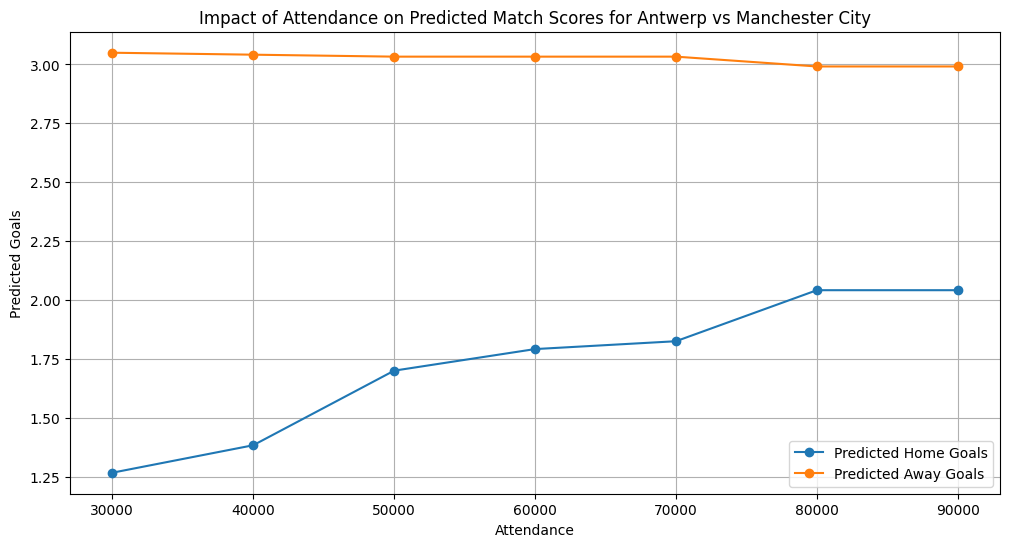

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data preprocessing
fan_impact_map = {
    'eng': 80.045367,
    'es': 56.117490,
    'de': 36.922798,
    'fr': 33.940926,
    'it': 27.067476,
    'nl': 16.554306,
    'sct': 0.000000,
    'ua':0.000000,
    'pt' : -4.257360,
    'dk' : -8.898000,
    'be' :-13.570000,
    'ch' :-21.000000,
    'rs' :-30.801111,
    'tr' :-33.426667,
    'at' :-47.462222,
} # from the above cell

df['FanImpactScore'] = df['HomeCountry'].map(fan_impact_map).fillna(0)

# Encode categorical features using OneHotEncoder
categorical_features = ['HomeTeam', 'AwayTeam', 'HomeCountry', 'AwayCountry']
encoder = OneHotEncoder(sparse=False)
encoded_categorical = encoder.fit_transform(df[categorical_features])

# Prepare feature matrix
X = np.hstack((encoded_categorical, df[['Attendance', 'FanImpactScore']].values))

# Prepare target variables
y_home = df['HomeGoals']
y_away = df['AwayGoals']

# Split the data into training and testing sets
X_train, X_test, y_home_train, y_home_test, y_away_train, y_away_test = train_test_split(
    X, y_home, y_away, test_size=0.2, random_state=45
)

# Train the model for home goals
model_home = RandomForestRegressor(n_estimators=120, random_state=45)
model_home.fit(X_train, y_home_train)

# Train the model for away goals
model_away = RandomForestRegressor(n_estimators=120, random_state=45)
model_away.fit(X_train, y_away_train)

# Evaluate the models
y_home_pred = model_home.predict(X_test)
y_away_pred = model_away.predict(X_test)

print('Home Goals Prediction:')
print('Mean Absolute Error:', mean_absolute_error(y_home_test, y_home_pred))

print('\nAway Goals Prediction:')
print('Mean Absolute Error:', mean_absolute_error(y_away_test, y_away_pred))

# Function to predict match score based on input parameters
def predict_match_score(home_team, away_team, home_country, away_country, attendance):
    # Encode input parameters
    input_data = pd.DataFrame({
        'HomeTeam': [home_team],
        'AwayTeam': [away_team],
        'HomeCountry': [home_country],
        'AwayCountry': [away_country],
        'Attendance': [attendance],
    })

    input_data['FanImpactScore'] = input_data['HomeCountry'].map(fan_impact_map).fillna(0)
    encoded_input = encoder.transform(input_data[categorical_features])
    input_features = np.hstack((encoded_input, input_data[['Attendance', 'FanImpactScore']].values))

    # Predict goals
    home_goals = model_home.predict(input_features)[0]
    away_goals = model_away.predict(input_features)[0]

    return home_goals, away_goals

# # Example prediction
# predicted_score = predict_match_score('Real Madrid', 'Antwerp', 'es', 80000)
# print(predicted_score)
# Define parameters for prediction
home_team = 'Antwerp'
away_team = 'Manchester City'
home_country = 'be'
away_country = 'eng'

# Define attendance range
attendances = range(30000, 100000, 10000)
home_goals = []
away_goals = []

# Predict scores for different attendance levels
for attendance in attendances:
    home_goal, away_goal = predict_match_score(home_team, away_team, home_country, away_country, attendance)
    home_goals.append(home_goal)
    away_goals.append(away_goal)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.plot(attendances, home_goals, label='Predicted Home Goals', marker='o')
plt.plot(attendances, away_goals, label='Predicted Away Goals', marker='o')

plt.xlabel('Attendance')
plt.ylabel('Predicted Goals')
plt.title(f'Impact of Attendance on Predicted Match Scores for {home_team} vs {away_team}')
plt.legend()
plt.grid(True)

plt.show()

# Predictive Models

use group stage performance to predict knockout outcome

In [ ]:
# Calculate average stats by team from group stage data
group_home_stats = group_df.groupby('HomeTeam').agg({
    'HomeGoals': 'mean',
    'HomeGD': 'mean',
    'HomeXG': 'mean',
    'HomeXGD': 'mean',
}).reset_index()

# Calculate away stats from group stage data
group_away_stats = group_df.groupby('AwayTeam').agg({
    'AwayGoals': 'mean',
    'AwayGD': 'mean',
    'AwayXG': 'mean',
    'AwayXGD': 'mean',
}).reset_index()

group_home_stats.head(), group_away_stats.head()

(          HomeTeam  HomeGoals    HomeGD    HomeXG   HomeXGD
 0          Antwerp   2.000000 -1.000000  1.400000 -0.166667
 1          Arsenal   4.000000  4.000000  2.133333  1.833333
 2  Atlético Madrid   3.666667  3.000000  1.666667  0.566667
 3        Barcelona   3.000000  2.333333  2.400000  1.633333
 4    Bayern Munich   2.000000  0.666667  1.800000  0.766667,
           AwayTeam  AwayGoals    AwayGD    AwayXG       AwayXGD
 0          Antwerp   0.000000 -2.666667  0.666667 -1.433333e+00
 1          Arsenal   1.333333  0.000000  1.466667  5.333333e-01
 2  Atlético Madrid   2.000000  0.666667  1.433333  3.666667e-01
 3        Barcelona   1.000000 -0.333333  1.100000  7.401487e-17
 4    Bayern Munich   2.000000  1.333333  1.333333  3.333333e-02)

In [ ]:
# Define key columns
key_columns = ['HomeTeam', 'AwayTeam', 'HomeXGD']

# Rename columns for clarity
group_train_df = group_df[key_columns].rename(columns={'HomeXGD': 'MatchOutcome'})
knockout_test_df = knockout_df[key_columns].rename(columns={'HomeXGD': 'MatchOutcome'})

# Merge average stats with the training dataset
group_train_df = group_train_df.merge(group_home_stats, on='HomeTeam')
group_train_df = group_train_df.merge(group_away_stats, on='AwayTeam')

# Merge average stats with the testing dataset
knockout_test_df = knockout_test_df.merge(group_home_stats, on='HomeTeam')
knockout_test_df = knockout_test_df.merge(group_away_stats, on='AwayTeam')


In [ ]:
# Define features and target

X_train = group_train_df.drop(columns=['HomeTeam', 'AwayTeam', 'MatchOutcome'])
y_train = group_train_df['MatchOutcome']

X_test = knockout_test_df.drop(columns=['HomeTeam', 'AwayTeam', 'MatchOutcome'])
y_test = knockout_test_df['MatchOutcome']

X_train.columns


Index(['HomeGoals', 'HomeGD', 'HomeXG', 'HomeXGD', 'AwayGoals', 'AwayGD',
       'AwayXG', 'AwayXGD'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin_reg = lin_reg.predict(X_test_scaled)

# Train Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=3, min_samples_split=4, min_samples_leaf=2, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf_reg = rf_reg.predict(X_test)

# Train Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.04, max_depth=3, min_samples_split=4, min_samples_leaf=2, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb_reg = gb_reg.predict(X_test)

In [ ]:
# Evaluate the models
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

mae_rf_reg = mean_absolute_error(y_test, y_pred_rf_reg)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

mae_gb_reg = mean_absolute_error(y_test, y_pred_gb_reg)
mse_gb_reg = mean_squared_error(y_test, y_pred_gb_reg)
r2_gb_reg = r2_score(y_test, y_pred_gb_reg)

# Compile and display results
results = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mae_lin_reg, mae_rf_reg, mae_gb_reg],
    'MSE': [mse_lin_reg, mse_rf_reg, mse_gb_reg],
    'R²': [r2_lin_reg, r2_rf_reg, r2_gb_reg]
}
results_df = pd.DataFrame(results)
results_df

,Model,MAE,MSE,R²
0,Linear Regression,0.935256,1.380826,0.052864
1,Random Forest,0.896897,1.233791,0.153718
2,Gradient Boosting,0.833578,1.051717,0.278606


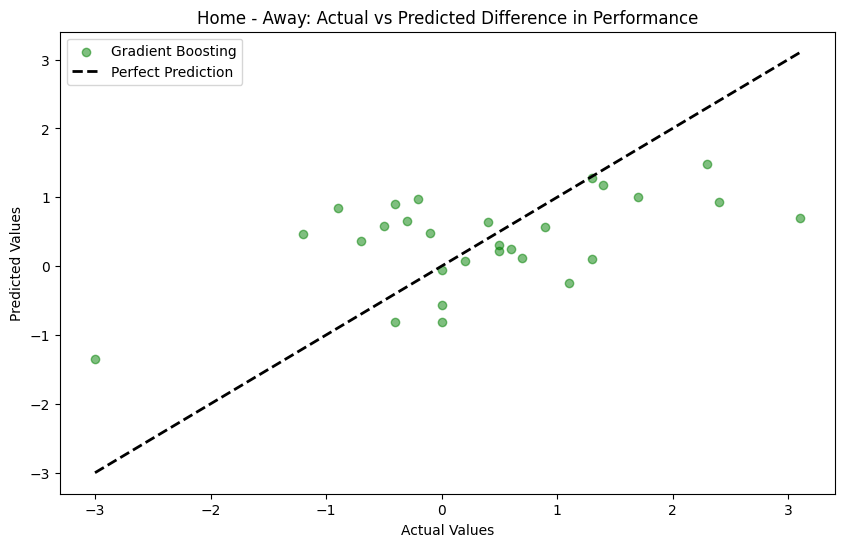

In [ ]:
plt.figure(figsize=(10, 6))
#plt.scatter(y_test, y_pred_lin_reg, alpha=0.5, color='red', label='Linear Regression')
#plt.scatter(y_test, y_pred_rf_reg, alpha=0.5, color='blue', label='Random Forest')
plt.scatter(y_test, y_pred_gb_reg, alpha=0.5, color='green', label='Gradient Boosting')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Home - Away: Actual vs Predicted Difference in Performance')
plt.legend()
plt.show()

In [ ]:
correlation = np.corrcoef(y_test, y_pred_gb_reg)[0, 1]
correlation

0.5282475874238517

# Data Visualization

In [ ]:
team_stats = df.groupby('HomeTeam').agg({
    'HomePts': 'mean',
    'HomeGoals': 'mean',
    'HomeGD': 'mean',
    'HomeXG': 'mean',
    'HomeXGD': 'mean',
    'Attendance': 'mean'
}).reset_index()

away_stats = df.groupby('AwayTeam').agg({
    'AwayPts': 'mean',
    'AwayGoals': 'mean',
    'AwayGD': 'mean',
    'AwayXG': 'mean',
    'AwayXGD': 'mean',
}).reset_index()

team_stats = team_stats.merge(away_stats, left_on='HomeTeam', right_on='AwayTeam')
team_stats = team_stats.drop(columns=['AwayTeam'])
team_stats

,HomeTeam,HomePts,HomeGoals,HomeGD,HomeXG,HomeXGD,Attendance,AwayPts,AwayGoals,AwayGD,AwayXG,AwayXGD
0,Antwerp,1.000000,2.000000,-1.000000,1.400000,-1.666667e-01,13570.000000,0.000000,0.000000,-2.666667,0.666667,-1.433333e+00
1,Arsenal,2.600000,3.800000,3.000000,1.660000,1.000000e+00,59869.800000,0.800000,0.800000,-0.400000,1.040000,2.000000e-02
2,Atlético Madrid,3.000000,3.600000,2.400000,1.980000,8.200000e-01,64803.200000,1.000000,1.600000,-0.200000,1.360000,-4.000000e-02
3,Barcelona,2.400000,2.600000,1.200000,2.200000,1.020000e+00,45308.200000,1.400000,1.400000,0.000000,1.180000,1.000000e-01
4,Bayern Munich,2.333333,2.000000,1.000000,1.966667,1.000000e+00,75000.000000,1.666667,1.500000,0.333333,1.233333,-3.166667e-01
5,Benfica,0.333333,1.000000,-1.000000,1.200000,-1.200000e+00,56621.000000,1.000000,1.333333,-0.333333,1.400000,-1.500000e+00
6,Braga,0.333333,1.000000,-0.666667,1.566667,4.333333e-01,21365.666667,1.000000,1.000000,-1.333333,1.200000,-1.000000e+00
7,Celtic,1.333333,1.666667,0.000000,1.400000,-2.333333e-01,56099.333333,0.000000,0.000000,-3.333333,0.233333,-2.033333e+00
8,Dortmund,2.333333,1.666667,1.166667,1.416667,-2.666667e-01,81365.000000,1.666667,1.166667,0.166667,1.133333,-9.333333e-01
9,FC Copenhagen,1.500000,1.750000,-0.250000,1.175000,-9.750000e-01,35592.000000,0.500000,0.750000,-0.750000,1.100000,2.500000e-02


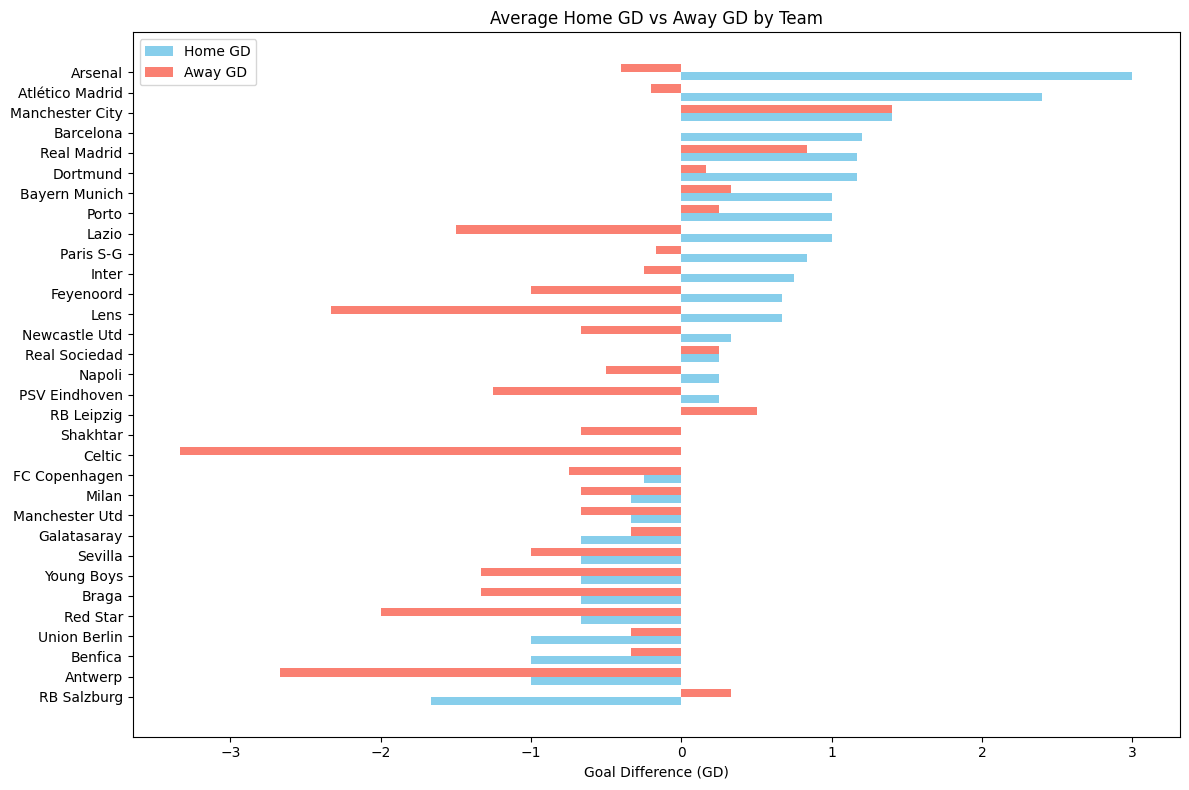

In [ ]:
# Prepare data for plotting
team_stats_sorted = team_stats.sort_values(by=['HomeGD', 'AwayGD'], ascending=True)
teams = team_stats_sorted['HomeTeam']
home_gd = team_stats_sorted['HomeGD']
away_gd = team_stats_sorted['AwayGD']

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Create horizontal bar plot for HomeGD and AwayGD
bar_width = 0.4
index = range(len(teams))

bars_home_gd = ax.barh(index, home_gd, bar_width, label='Home GD', color='skyblue', align='center')
bars_away_gd = ax.barh([i + bar_width for i in index], away_gd, bar_width, label='Away GD', color='salmon', align='center')

# Add labels
ax.set_yticks([i + bar_width / 2 for i in index])
ax.set_yticklabels(teams)
ax.set_xlabel('Goal Difference (GD)')
ax.set_title('Average Home GD vs Away GD by Team')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
correlations = team_stats.drop(columns=['HomeTeam']).corr()['Attendance']
correlations = correlations.drop('Attendance')
correlations

,Attendance
HomePts,0.356899
AwayPts,-0.365052
HomeGoals,0.189819
AwayGoals,-0.413078
HomeXG,0.357476
AwayXG,-0.235200
HomeGD,0.404608
AwayGD,-0.404608
HomeXGD,0.317164
AwayXGD,-0.317164


Attendance vs Home goals correlation plot

Attendance vs Home goal difference correlation plot



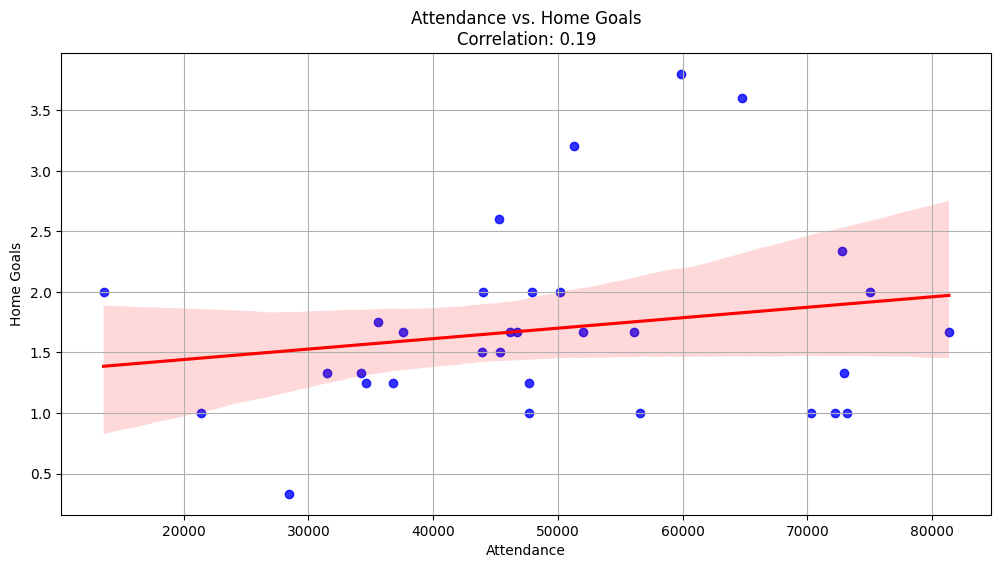

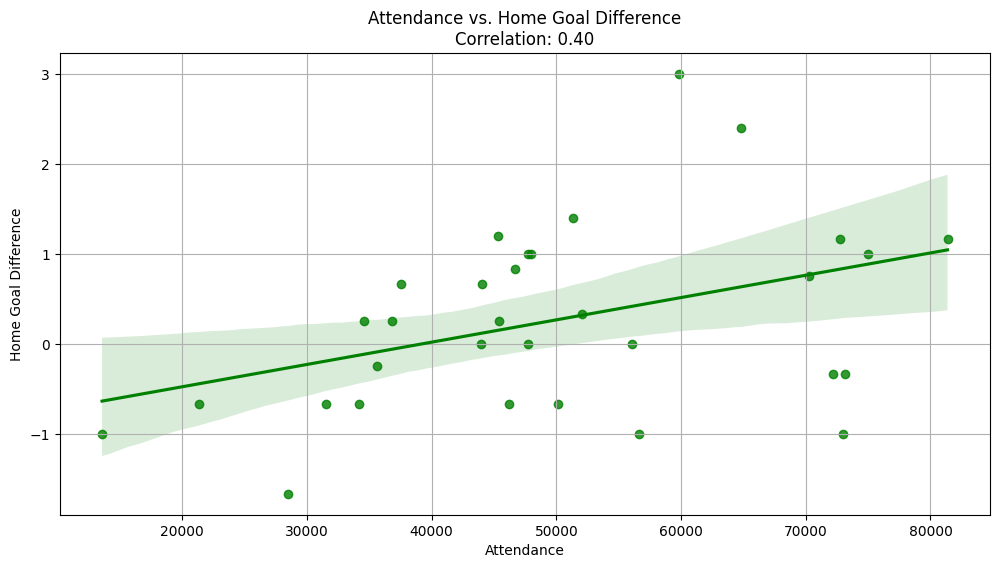

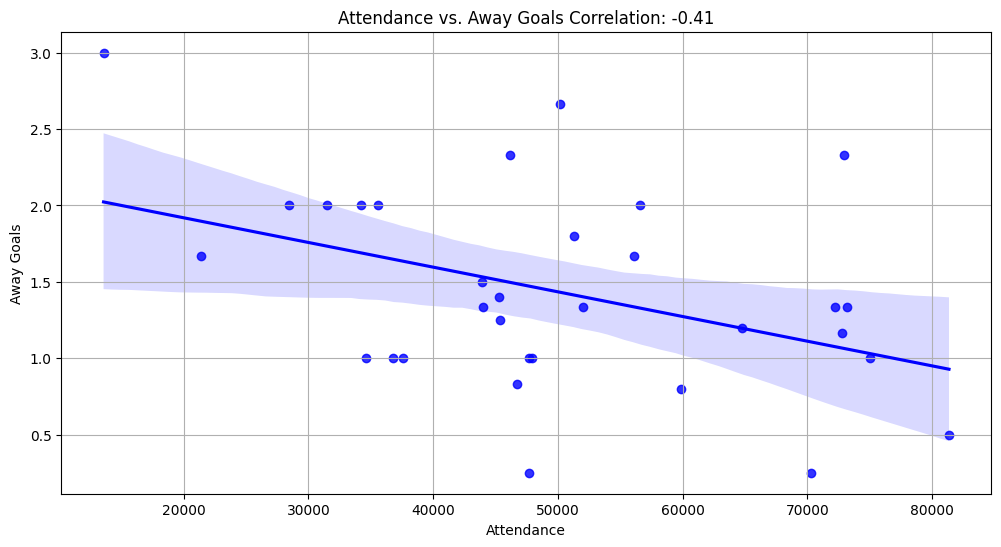

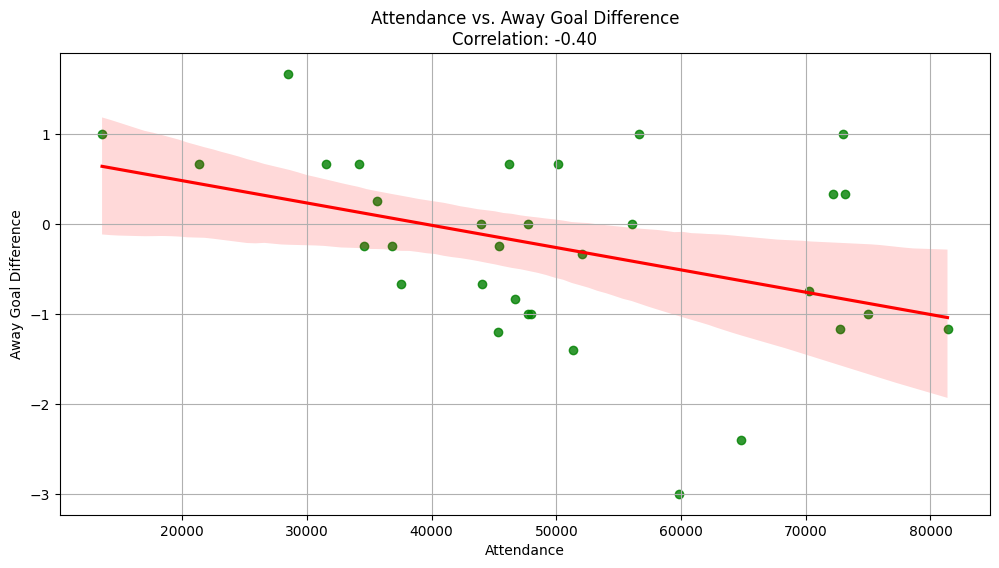

In [ ]:
# Attendance vs. Home Goals with a line of best fit

plt.figure(figsize=(12, 6))
sns.regplot(x='Attendance', y='HomeGoals', data=team_stats, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title(f"Attendance vs. Home Goals\nCorrelation: {correlations['HomeGoals']:.2f}")
plt.xlabel('Attendance')
plt.ylabel('Home Goals')
plt.grid(True)
plt.show()

# Attendance vs. Home Goal Difference with a line of best fit
plt.figure(figsize=(12, 6))
sns.regplot(x='Attendance', y='HomeGD', data=team_stats, scatter_kws={"color": "green"}, line_kws={"color": "green"})
plt.title(f"Attendance vs. Home Goal Difference\nCorrelation: {correlations['HomeGD']:.2f}")
plt.xlabel('Attendance')
plt.ylabel('Home Goal Difference')
plt.grid(True)
plt.show()

# Attendance vs. Away Goals with a line of best fit

plt.figure(figsize=(12, 6))
sns.regplot(x='Attendance', y='AwayGoals', data=team_stats, scatter_kws={"color": "blue"}, line_kws={"color": "blue"})
plt.title(f"Attendance vs. Away Goals Correlation: {correlations['AwayGoals']:.2f}")
plt.xlabel('Attendance')
plt.ylabel('Away Goals')
plt.grid(True)
plt.show()

# Attendance vs. Away Goal Difference with a line of best fit
plt.figure(figsize=(12, 6))
sns.regplot(x='Attendance', y='AwayGD', data=team_stats, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title(f"Attendance vs. Away Goal Difference\nCorrelation: {correlations['AwayGD']:.2f}")
plt.xlabel('Attendance')
plt.ylabel('Away Goal Difference')
plt.grid(True)
plt.show()

Home vs Away Difference

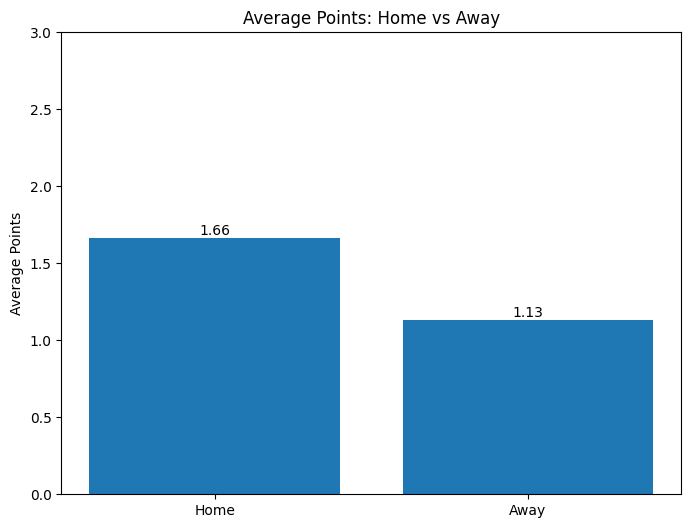

In [ ]:
# Visualize the difference
plt.figure(figsize=(8, 6))
plt.bar(['Home', 'Away'], [avg_home_pts, avg_away_pts])
plt.title('Average Points: Home vs Away')
plt.ylabel('Average Points')
plt.ylim(0, 3)  # Set y-axis limit to 3 (max points possible)
for i, v in enumerate([avg_home_pts, avg_away_pts]):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

Fans Impact by Country

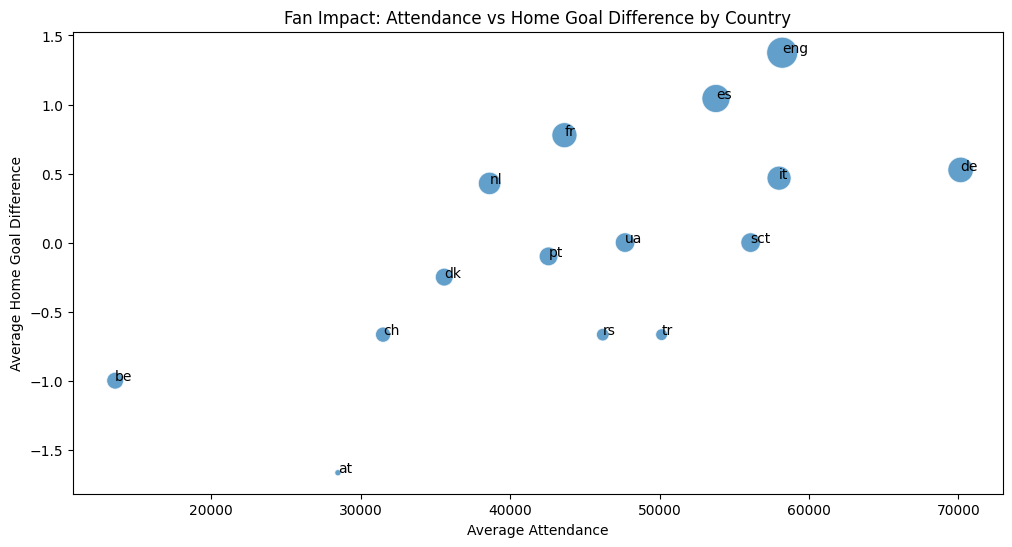

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 6))
sns.scatterplot(data=country_stats, x='Attendance', y='HomeGD', size='FanImpactScore',
                sizes=(20, 500), alpha=0.7, legend=False)

for i, row in country_stats.iterrows():
    plt.annotate(row['HomeCountry'], (row['Attendance'], row['HomeGD']))

plt.title('Fan Impact: Attendance vs Home Goal Difference by Country')
plt.xlabel('Average Attendance')
plt.ylabel('Average Home Goal Difference')
plt.show()

#T-Test

<ipython-input-221-8503b56e9fd0>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=team_points['Points_Home'], shade=True, label='Home Points')
<ipython-input-221-8503b56e9fd0>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=team_points['Points_Away'], shade=True, label='Away Points')


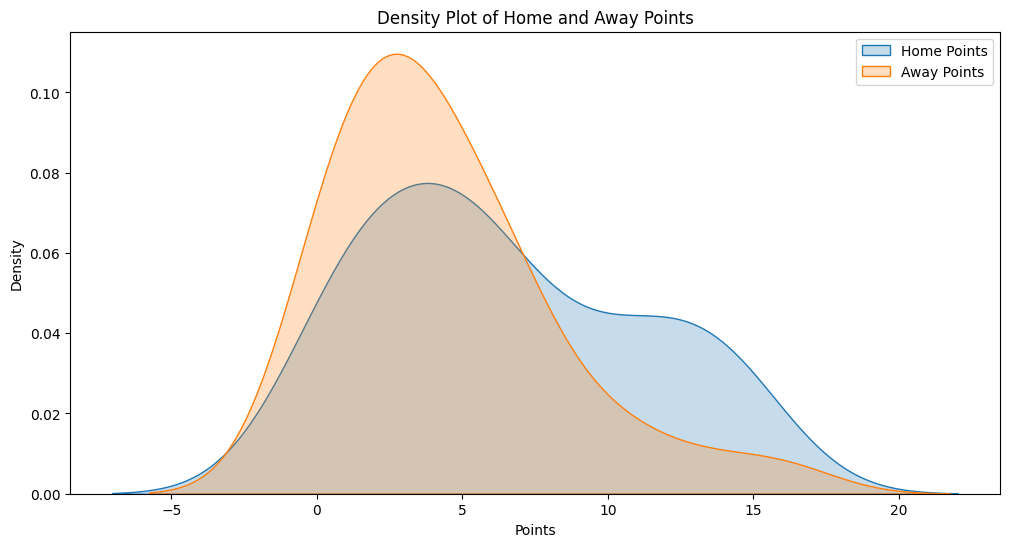

Shapiro-Wilk test p-value for Home Points: 0.0235
Shapiro-Wilk test p-value for Away Points: 0.0031

Two-sample T-test results:
T-statistic: 3.3777
P-value: 0.0020

Effect size (Cohen's d): 0.4820

Reject the null hypothesis.
There is statistically significant evidence of home advantage.

On average, teams score 2.06 more points at home than away.


In [ ]:
# Create separate DataFrames for home and away games
home_df = df[['HomeTeam', 'HomePts']].rename(columns={'HomeTeam': 'Team', 'HomePts': 'Points'})
away_df = df[['AwayTeam', 'AwayPts']].rename(columns={'AwayTeam': 'Team', 'AwayPts': 'Points'})

# Aggregate points for each team
home_points = home_df.groupby('Team')['Points'].sum().reset_index()
away_points = away_df.groupby('Team')['Points'].sum().reset_index()

# Merge home and away points
team_points = pd.merge(home_points, away_points, on='Team', suffixes=('_Home', '_Away'))

# Verify normality assumption
plt.figure(figsize=(12, 6))
sns.kdeplot(data=team_points['Points_Home'], shade=True, label='Home Points')
sns.kdeplot(data=team_points['Points_Away'], shade=True, label='Away Points')
plt.title('Density Plot of Home and Away Points')
plt.xlabel('Points')
plt.ylabel('Density')
plt.legend()
plt.show()

# Perform Shapiro-Wilk test for normality
_, p_value_home = stats.shapiro(team_points['Points_Home'])
_, p_value_away = stats.shapiro(team_points['Points_Away'])

print(f"Shapiro-Wilk test p-value for Home Points: {p_value_home:.4f}")
print(f"Shapiro-Wilk test p-value for Away Points: {p_value_away:.4f}")

# Perform two-sample T-test
t_statistic, p_value = stats.ttest_rel(team_points['Points_Home'], team_points['Points_Away'])

print(f"\nTwo-sample T-test results:")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Calculate effect size (Cohen's d)
mean_diff = np.mean(team_points['Points_Home'] - team_points['Points_Away'])
pooled_std = np.sqrt((np.std(team_points['Points_Home'], ddof=1)**2 +
                      np.std(team_points['Points_Away'], ddof=1)**2) / 2)
cohens_d = mean_diff / pooled_std

print(f"\nEffect size (Cohen's d): {cohens_d:.4f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis.")
    print("There is statistically significant evidence of home advantage.")
else:
    print("\nFail to reject the null hypothesis.")
    print("There is not statistically significant evidence of home advantage.")

print(f"\nOn average, teams score {mean_diff:.2f} more points at home than away.")